## Forecasting of Hourly Demand
**Problem Statement** <br>
ABC is a car rental company based out of Bangalore. It rents cars for both in and out stations at affordable prices. The users can rent different types of cars like Sedans, Hatchbacks, SUVs and MUVs, Minivans and so on.

In recent times, the demand for cars is on the rise. As a result, the company would like to tackle the problem of supply and demand. The ultimate goal of the company is to strike the balance between the supply and demand inorder to meet the user expectations. 

The company has collected the details of each rental. Based on the past data, the company would like to forecast the demand of car rentals on an hourly basis. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.metrics import mean_squared_error as mse

import os
import sys
import warnings
warnings.simplefilter("ignore")

plt.rcParams.update({'figure.figsize':(20,10)})
plt.style.use('fivethirtyeight')

In [2]:
def rmse(x,y):
    return round(np.sqrt(mse(x,y)),4)

In [3]:
for dirname,_,filenames in os.walk('D:\Data Science\Competitions\Jobathon - TS'):
    for filename in filenames:
        print(os.path.join(dirname,filename))    

D:\Data Science\Competitions\Jobathon - TS\submission.csv
D:\Data Science\Competitions\Jobathon - TS\test.csv
D:\Data Science\Competitions\Jobathon - TS\train.csv


In [4]:
train = pd.read_csv(r'D:\Data Science\Competitions\Jobathon - TS\train.csv')

In [5]:
submission = pd.read_csv(r'D:\Data Science\Competitions\Jobathon - TS\submission.csv')

In [6]:
submission.head()

,date,hour,demand
0,2021-03-01,0,0
1,2021-03-01,1,0
2,2021-03-01,2,0
3,2021-03-01,3,0
4,2021-03-01,5,0


In [7]:
train.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [8]:
test = pd.read_csv(r'D:\Data Science\Competitions\Jobathon - TS\test.csv')
test.head()

,date,hour
0,2021-03-01,0
1,2021-03-01,1
2,2021-03-01,2
3,2021-03-01,3
4,2021-03-01,5


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


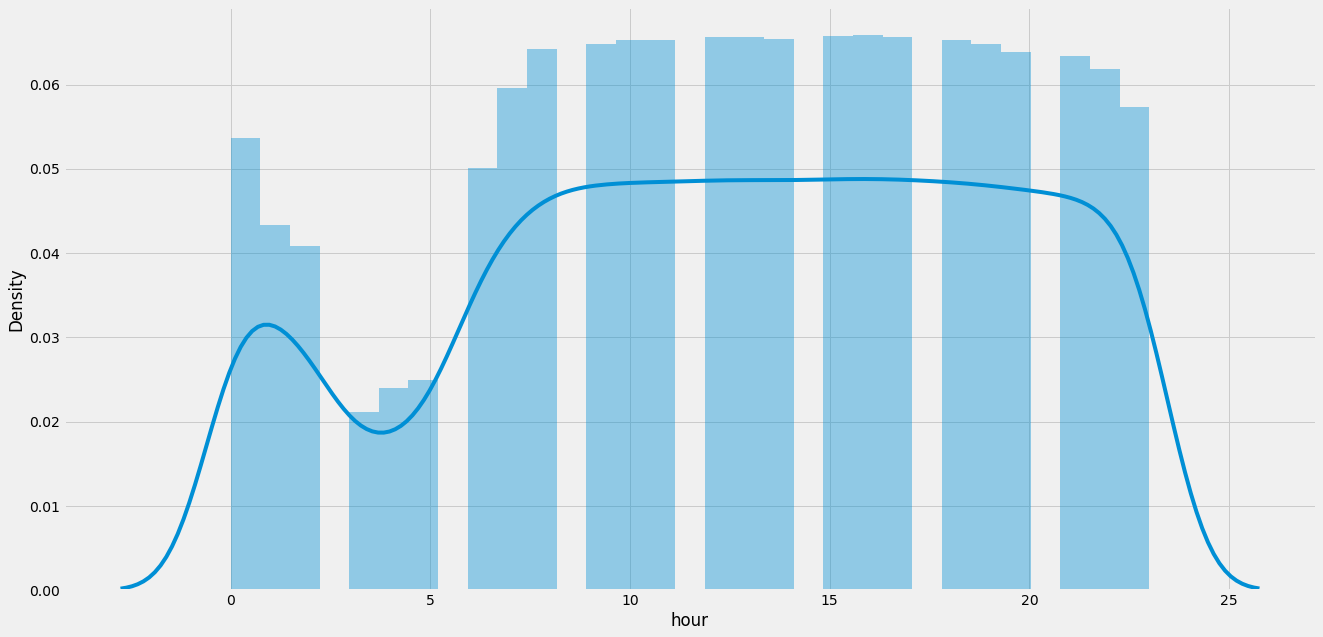

In [10]:
sns.distplot(train['hour'])
plt.show()

<AxesSubplot:>

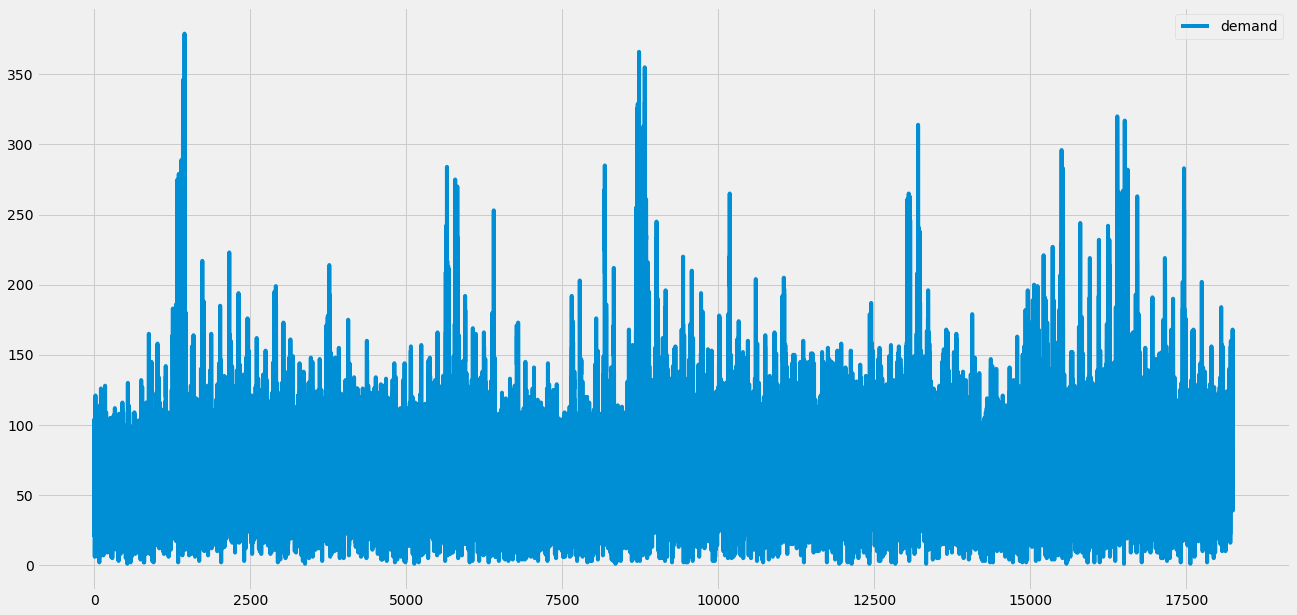

In [11]:
train[['date','demand']].plot()

In [12]:
train['date'] = pd.to_datetime(train['date'],yearfirst=True,infer_datetime_format=True)

In [13]:
epoch= pd.Timestamp("2018-08-25")
'''The function generates varous features which will be useful for regression later'''

def feature_gen(df):
    df['dayofweek'] = pd.to_datetime(df['date']).dt.dayofweek
    
    df['month'] = pd.to_datetime(df['date']).dt.month
    
    df['is_weekend'] = df.dayofweek.apply(lambda x: 0 if x<5 else 1)
    
    df['wom'] =  pd.to_datetime(df['date']).apply(lambda d: (d.day-1) // 7 + 1)
    
    df['is_month_start'] = pd.to_datetime(df['date']).dt.is_month_start.apply(lambda x : int(x))

    df['is_month_end'] = pd.to_datetime(df['date']).dt.is_month_end.apply(lambda x : int(x))
    
    df["week_number"]=np.where(df.date.astype("datetime64").le(epoch), \
                               df.date.astype("datetime64").dt.week, \
                               df.date.astype("datetime64").sub(epoch).dt.days//7+52)
    
    #df['Is_quarter_start'] = pd.to_datetime(df['DateTime']).dt.is_quarter_start

    #df['Is_quarter_end'] = pd.to_datetime(df['DateTime']).dt.is_quarter_end

    df['is_year_start'] = pd.to_datetime(df['date']).dt.is_year_start.apply(lambda x : int(x))

    df['is_year_end'] = pd.to_datetime(df['date']).dt.is_year_end.apply(lambda x : int(x))
    
    return df

In [14]:
train.columns

Index(['date', 'hour', 'demand'], dtype='object')

In [15]:
train = feature_gen(train)

In [16]:
test = feature_gen(test)

In [17]:
train.head()

,date,hour,demand,dayofweek,month,is_weekend,wom,is_month_start,is_month_end,week_number,is_year_start,is_year_end
0,2018-08-18,9,91,5,8,1,3,0,0,33,0,0
1,2018-08-18,10,21,5,8,1,3,0,0,33,0,0
2,2018-08-18,13,23,5,8,1,3,0,0,33,0,0
3,2018-08-18,14,104,5,8,1,3,0,0,33,0,0
4,2018-08-18,15,81,5,8,1,3,0,0,33,0,0


In [18]:
test.head()

,date,hour,dayofweek,month,is_weekend,wom,is_month_start,is_month_end,week_number,is_year_start,is_year_end
0,2021-03-01,0,0,3,0,1,1,0,183,0,0
1,2021-03-01,1,0,3,0,1,1,0,183,0,0
2,2021-03-01,2,0,3,0,1,1,0,183,0,0
3,2021-03-01,3,0,3,0,1,1,0,183,0,0
4,2021-03-01,5,0,3,0,1,1,0,183,0,0


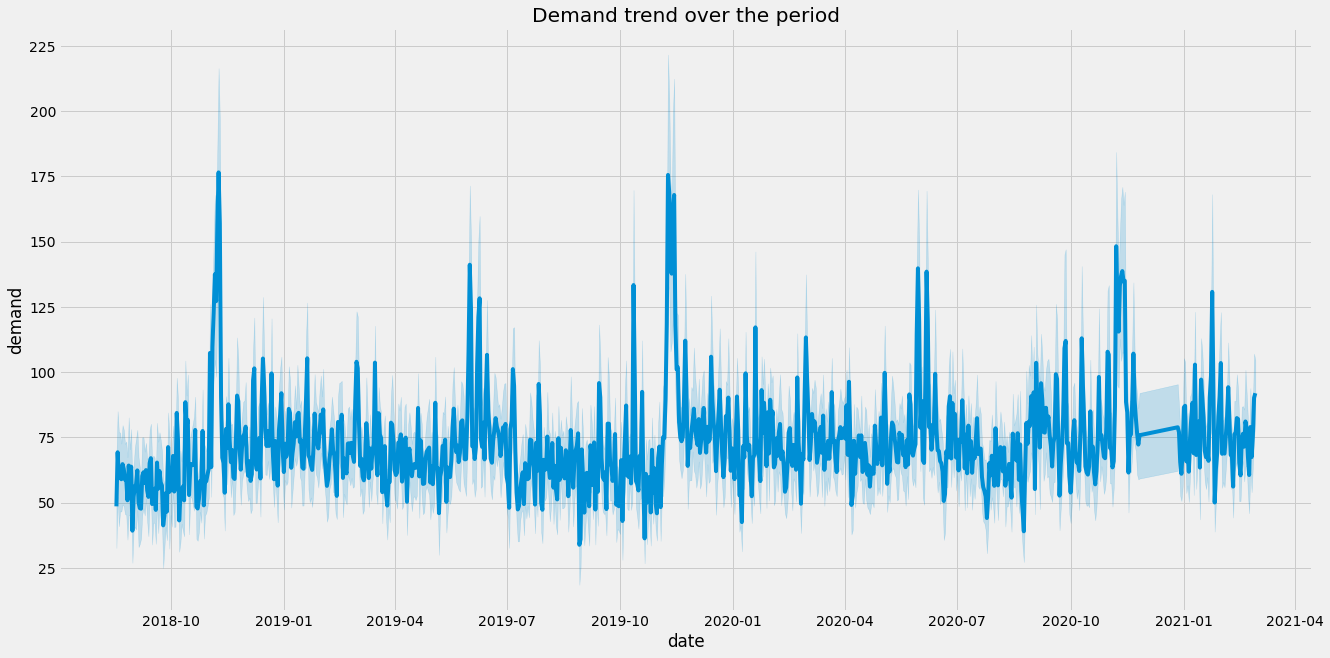

In [19]:
sns.lineplot(x='date',y='demand',data=train)
plt.title("Demand trend over the period");

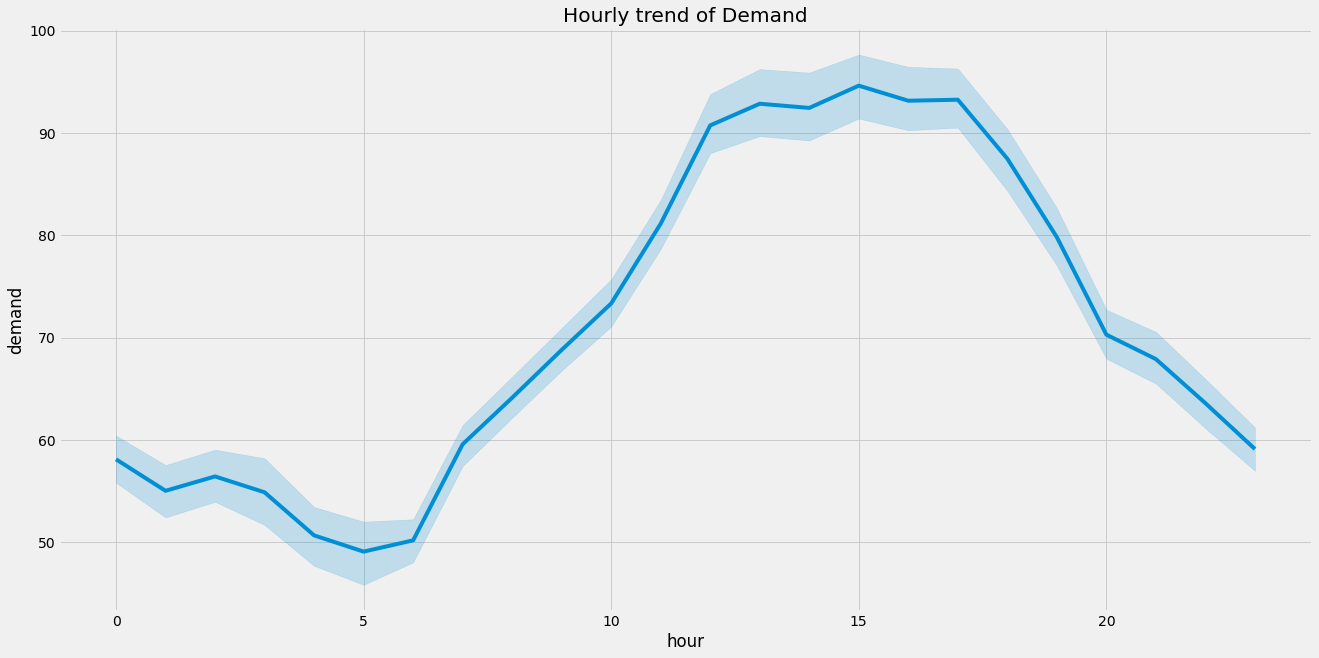

In [20]:
sns.lineplot(x='hour',y='demand',data=train);
plt.title("Hourly trend of Demand");

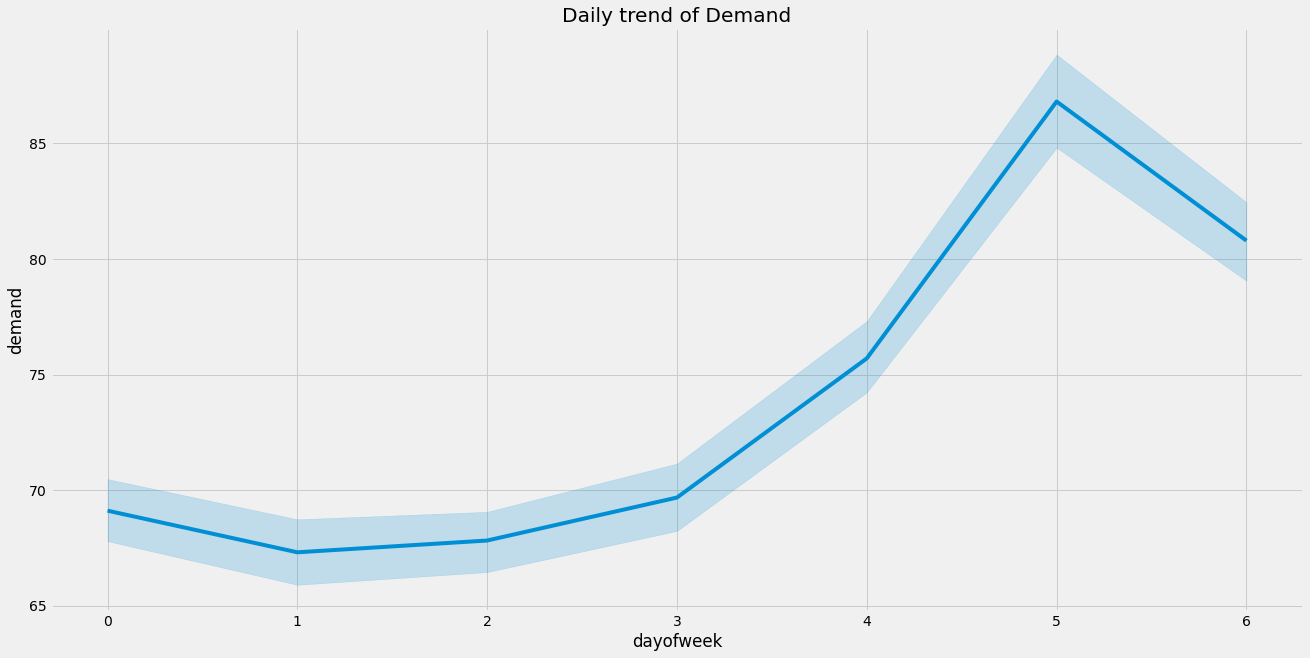

In [21]:
sns.lineplot(x='dayofweek',y='demand',data=train);
plt.title("Daily trend of Demand");

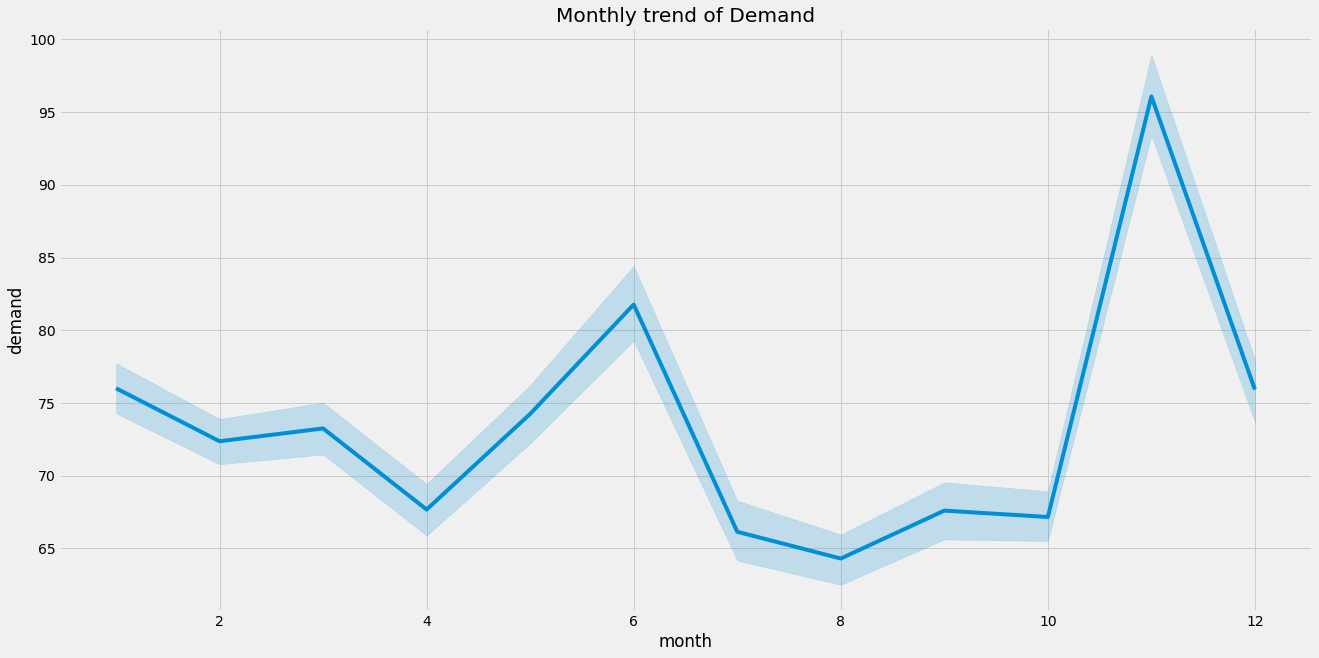

In [22]:
sns.lineplot(x='month',y='demand',data=train);
plt.title("Monthly trend of Demand");

Splitting Data

In [23]:
x_train = train.loc[train.date.dt.year<2021]
y_train = x_train.pop('demand')

In [24]:
x_valid = train.loc[train.date.dt.year==2021]
y_valid = x_valid.pop('demand')

In [25]:
x_train.shape,x_valid.shape

((16942, 11), (1305, 11))

In [26]:
train.columns

Index(['date', 'hour', 'demand', 'dayofweek', 'month', 'is_weekend', 'wom',
       'is_month_start', 'is_month_end', 'week_number', 'is_year_start',
       'is_year_end'],
      dtype='object')

In [27]:
features = ['hour', 'dayofweek', 'month', 'is_weekend', 'wom',
       'is_month_start', 'is_month_end', 'is_year_start',
       'is_year_end']

In [28]:
import lightgbm as lgb

In [29]:
model = lgb.LGBMRegressor(n_estimators=3500, 
                  num_leaves=125, 
                  max_depth=10,
                  min_child_samples=3,
                  learning_rate=0.01,
                  colsample_bytree=0.5,
                  reg_alpha=0.5,
                  reg_lambda=2)
model.fit(x_train[features], y_train,eval_set=[(x_train[features],y_train),(x_valid[features], y_valid)],early_stopping_rounds=100, verbose=100,eval_metric='rmse')

Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 37.073	valid_0's l2: 1374.4	valid_1's rmse: 35.2866	valid_1's l2: 1245.14
[200]	valid_0's rmse: 34.8891	valid_0's l2: 1217.25	valid_1's rmse: 33.9137	valid_1's l2: 1150.14
[300]	valid_0's rmse: 33.8737	valid_0's l2: 1147.43	valid_1's rmse: 33.4972	valid_1's l2: 1122.06
[400]	valid_0's rmse: 33.1909	valid_0's l2: 1101.64	valid_1's rmse: 33.3178	valid_1's l2: 1110.08
[500]	valid_0's rmse: 32.8208	valid_0's l2: 1077.2	valid_1's rmse: 33.2453	valid_1's l2: 1105.25
[600]	valid_0's rmse: 32.5164	valid_0's l2: 1057.31	valid_1's rmse: 33.2477	valid_1's l2: 1105.41
Early stopping, best iteration is:
[503]	valid_0's rmse: 32.8114	valid_0's l2: 1076.59	valid_1's rmse: 33.2425	valid_1's l2: 1105.06


LGBMRegressor(colsample_bytree=0.5, learning_rate=0.01, max_depth=10,
              min_child_samples=3, n_estimators=3500, num_leaves=125,
              reg_alpha=0.5, reg_lambda=2)

In [30]:
forecasting = model.predict(test[features])

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

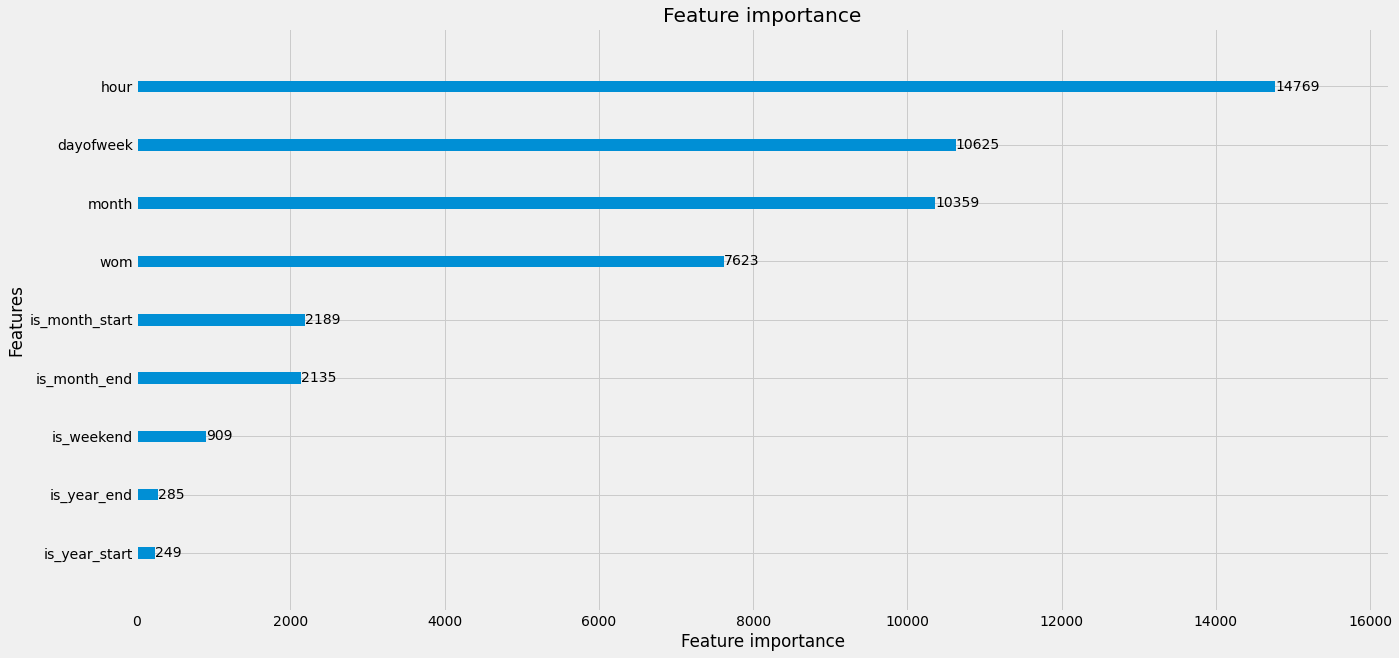

In [31]:
lgb.plot_importance(model, ax=None, height=0.2, xlim=None, ylim=None, title='Feature importance', xlabel='Feature importance', ylabel='Features')

In [32]:
submission['demand'] = forecasting

<AxesSubplot:xlabel='date'>

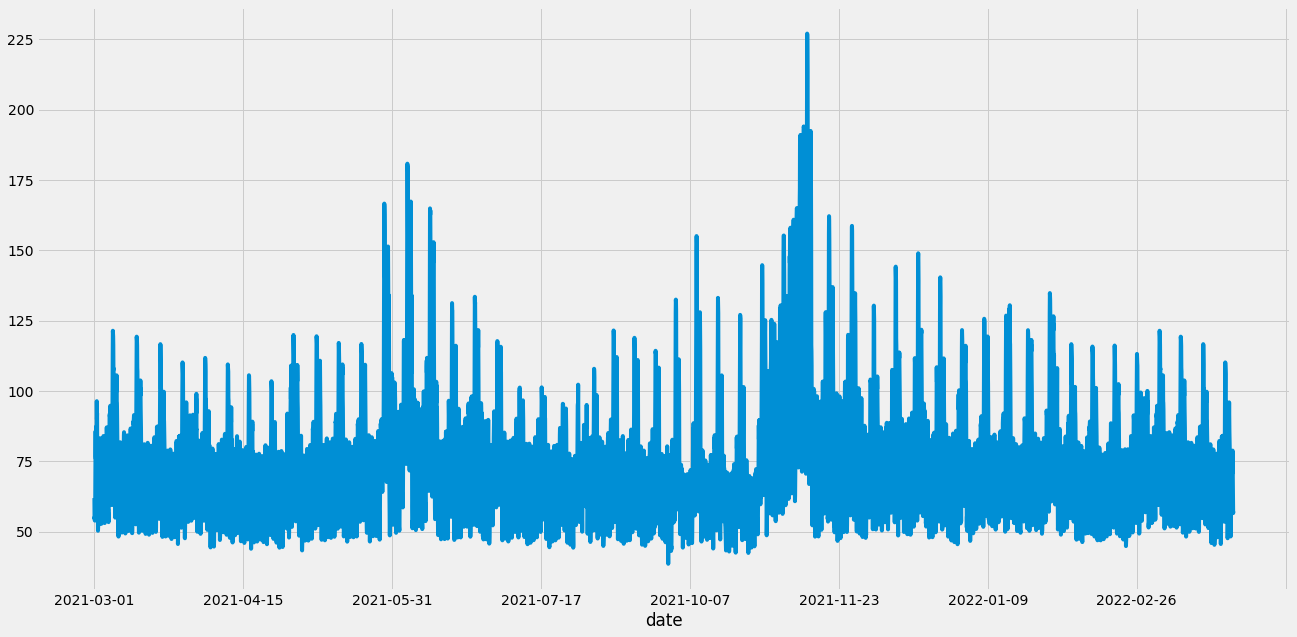

In [33]:
submission.set_index('date')['demand'].plot()

In [34]:
submission.to_csv('submission_ts_jobathon_final.csv',index=False)

# End